In [2]:
#libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

In [3]:
#we gonna use the mnist fashion dataset, this one however is on grayscale. So just one layer.
(train_data, train_label), (test_data, test_label)= keras.datasets.fashion_mnist.load_data()

In [4]:
Labelname= ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
#checking the data
train_data.shape                #there are 60000 images, with 28x28 res size
Imageshape=train_data[1].shape
np.unique(train_label)           #10 Classification

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

C:\Users\Rhey\AppData\Local\Temp\ipykernel_18864\1019980347.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


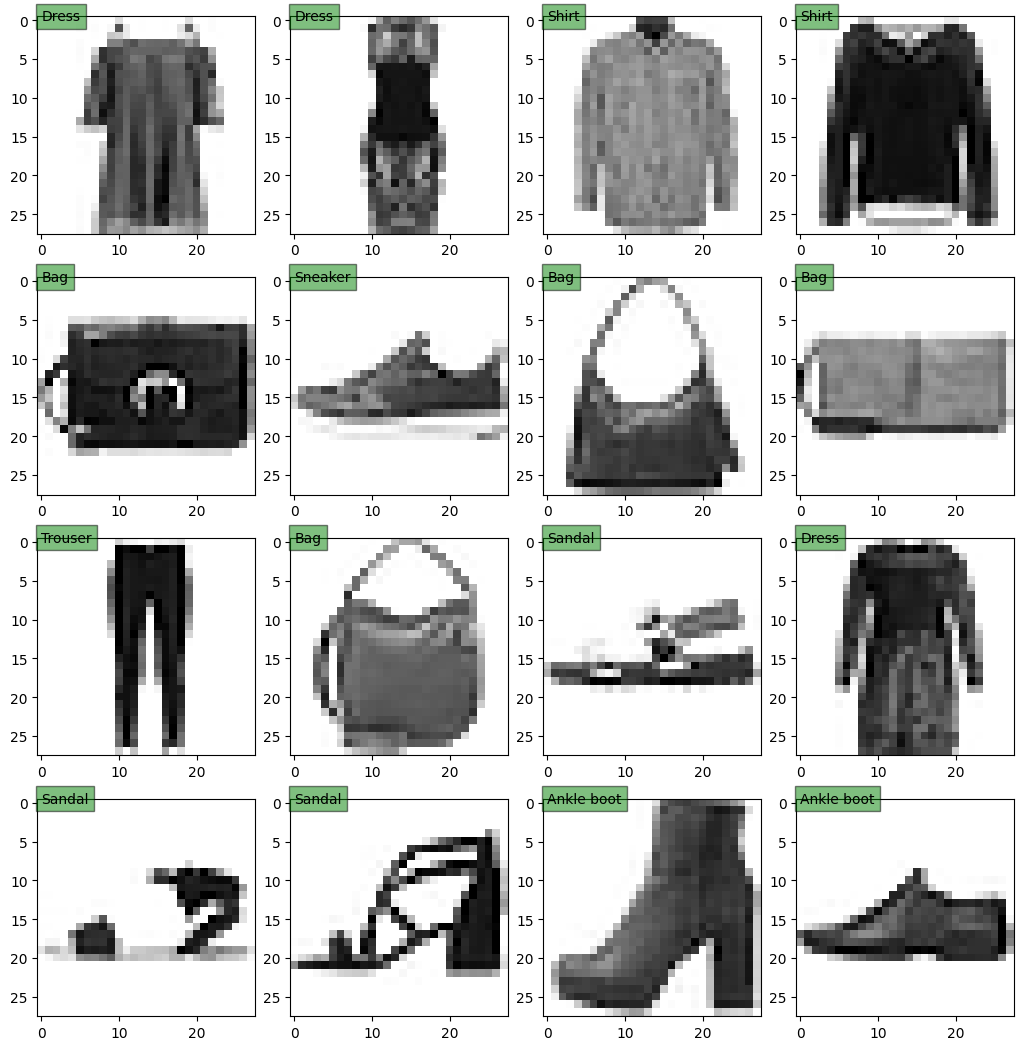

In [6]:
#Using matplotlib to visualize  (Getting 16 datas)
fig=plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,0.5,0.5,0.05)
for i in range(16):
    ax=fig.add_subplot(4,4 , i+1)
    randomint=rd.randint(0,len(train_data))
    ax.imshow(train_data[randomint], cmap="binary")
    ax.text(0,0, str(Labelname[train_label[randomint]]), bbox=dict(facecolor='green', alpha=0.5))
fig.show()

In [7]:
#changing the data value of each data instead of 0-255, into 0-1
train_data=train_data/255.0
test_data=test_data/255.0

In [49]:
#Train a model for the dataset!

model=keras.Sequential([
    keras.layers.Flatten(input_shape=Imageshape),                           #input layer
    keras.layers.Dense(256, activation=keras.activations.relu),             #hidden layer
    keras.layers.Dense(len(Labelname))]                              #output layer
)

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
model.fit(train_data, train_label, epochs=11)

Epoch 1/11
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4851 - accuracy: 0.8271
Epoch 2/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3646 - accuracy: 0.8673
Epoch 3/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3264 - accuracy: 0.8812
Epoch 4/11
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3065 - accuracy: 0.8865
Epoch 5/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2850 - accuracy: 0.8939
Epoch 6/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2720 - accuracy: 0.8989
Epoch 7/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2597 - accuracy: 0.9040
Epoch 8/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2479 - accuracy: 0.9079
Epoch 9/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2373 - accuracy: 0.9108
Epoch 10/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.228

In [52]:
model.evaluate(test_data, test_label)

313/313 [==============================] - 1s 1ms/step - loss: 0.3405 - accuracy: 0.8855


[0.3405103087425232, 0.8855000138282776]

In [53]:
#Get predicted
predictedmodel=keras.Sequential([model,
                                 keras.layers.Softmax()])
predicted=predictedmodel.predict(test_data)

313/313 [==============================] - 0s 1ms/step


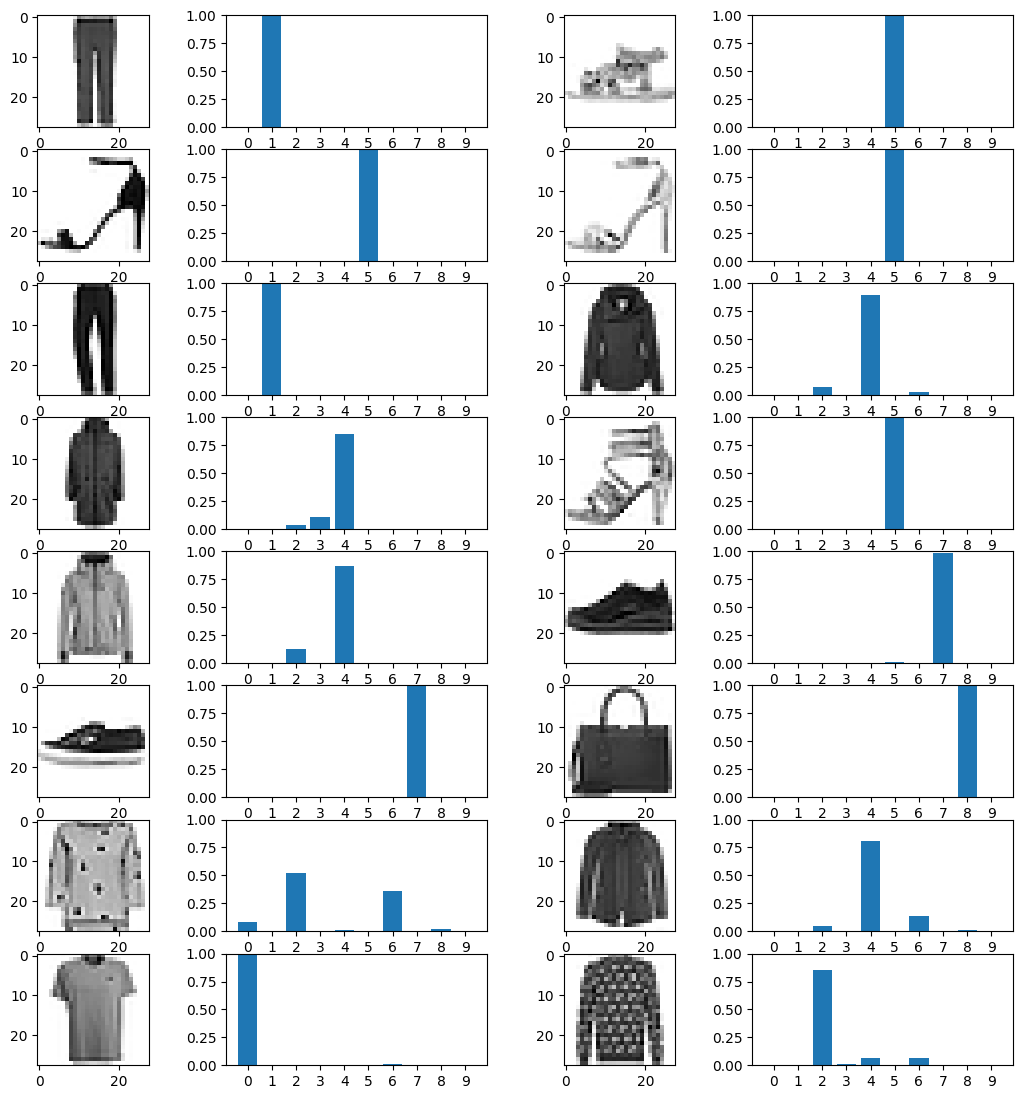

In [62]:
#showing image, actual vs predicted. 16 Images
fig= plt.figure(figsize=(21,21))
fig.subplots_adjust(0,0,0.5,0.5,0.01)
counter=0
for i in range (16):
    counter+=1
    ax=fig.add_subplot(8,4, counter)
    sample=rd.randint(0,len(test_data))
    ax.imshow(test_data[sample], cmap="binary")
    if np.argmax(predicted[sample]) != test_label[sample]:
        ax.text(0,5, f'wrong\n{Labelname[test_label[sample]]}', bbox=dict(facecolor='red', alpha=0.5))
    counter+=1
    ax=fig.add_subplot(8,4, counter)
    ax.set_xticks(range(10))
    ax.set_ylim([0, 1])
    ax.bar(range(10), predicted[sample])